<a href="https://colab.research.google.com/github/Ruchit42/Online_News_Shares/blob/main/Capstone_News_shares_current_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing Libraries important for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
# Load the csv file which contains the dataset
df = pd.read_csv('/content/sample_data/OnlineNewsPopularity.csv',index_col = 0)#--setting index col allows selecting data by labels (further below)



In [ ]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
url,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.575130,1.0,0.663866,3,1,1,0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
df.shape

(39644, 60)

In [ ]:
#understanding the descriptive information about the data
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


#Preparing data for analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39644 entries, http://mashable.com/2013/01/07/amazon-instant-video-browser/ to http://mashable.com/2014/12/27/youtube-channels-2015/
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      39644 non-null  int64  
 1   n_tokens_title                 39644 non-null  int64  
 2   n_tokens_content               39644 non-null  int64  
 3   n_unique_tokens                39644 non-null  float64
 4   n_non_stop_words               39644 non-null  float64
 5   n_non_stop_unique_tokens       39644 non-null  float64
 6   num_hrefs                      39644 non-null  int64  
 7   num_self_hrefs                 39644 non-null  int64  
 8   num_imgs                       39644 non-null  int64  
 9   num_videos                     39644 non-null  int64  
 10  average_token_length           39644 non-null  float64
 11  num_

* Almost all of the variables are float data type and the targer variable is of type int


In [ ]:
# Check for any null values
df.isnull().sum()

timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_s

* No NULL values!!!

In [ ]:
import pandas as pd

# Define a function that combines features into a single category
def combine_features(row):
    # Implement your logic here
    # For example, combining the features by some criteria:
    if row['data_channel_is_lifestyle'] == 1 :
        return 'Lifestyle'
    elif row['data_channel_is_entertainment'] == 1:
        return 'Entertainment'
    elif row['data_channel_is_bus'] == 1:
        return 'Business'
    elif row['data_channel_is_socmed'] == 1:
        return 'Social Media'
    elif row['data_channel_is_tech'] == 1:
        return 'Tech'
    elif row['data_channel_is_world'] == 1:
        return 'World'

# Apply the function across the rows and create a new categorical feature
df['data_channel'] = df.apply(combine_features, axis=1)


In [ ]:
import pandas as pd

# Define a function that combines features into a single category
def combine_features(row):
    # Implement your logic here
    # For example, combining the features by some criteria:
    if row['weekday_is_monday'] == 1 :
        return 'Monday'
    elif row['weekday_is_tuesday'] == 1:
        return 'Tuesday'
    elif row['weekday_is_wednesday'] == 1:
        return 'Wednesday'
    elif row['weekday_is_thursday'] == 1:
        return 'Thursday'
    elif row['weekday_is_friday'] == 1:
        return 'Friday'
    elif row['weekday_is_saturday'] == 1:
        return 'Saturday'
    elif row['weekday_is_sunday'] == 1:
        return 'Sunday'

# Apply the function across the rows and create a new categorical feature
df['day_published'] = df.apply(combine_features, axis=1)


In [ ]:
# Checking for duplicates in our dataframe
#Check for dulicate rows except the first occurrence
df.duplicated()

url
http://mashable.com/2013/01/07/amazon-instant-video-browser/                             False
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/                              False
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/                           False
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/                                 False
http://mashable.com/2013/01/07/att-u-verse-apps/                                         False
                                                                                         ...  
http://mashable.com/2014/12/27/samsung-app-autism/                                       False
http://mashable.com/2014/12/27/seth-rogen-james-franco-will-live-tweet-the-interview/    False
http://mashable.com/2014/12/27/son-pays-off-mortgage/                                    False
http://mashable.com/2014/12/27/ukraine-blasts/                                           False
http://mashable.com/2014/12/27/youtube-channel

In [ ]:
df['data_channel']

url
http://mashable.com/2013/01/07/amazon-instant-video-browser/                             Entertainment
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/                                   Business
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/                                Business
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/                                 Entertainment
http://mashable.com/2013/01/07/att-u-verse-apps/                                                  Tech
                                                                                             ...      
http://mashable.com/2014/12/27/samsung-app-autism/                                                Tech
http://mashable.com/2014/12/27/seth-rogen-james-franco-will-live-tweet-the-interview/     Social Media
http://mashable.com/2014/12/27/son-pays-off-mortgage/                                             None
http://mashable.com/2014/12/27/ukraine-blasts/                       

In [ ]:
df['day_published']

url
http://mashable.com/2013/01/07/amazon-instant-video-browser/                                Monday
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/                                 Monday
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/                              Monday
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/                                    Monday
http://mashable.com/2013/01/07/att-u-verse-apps/                                            Monday
                                                                                           ...    
http://mashable.com/2014/12/27/samsung-app-autism/                                       Wednesday
http://mashable.com/2014/12/27/seth-rogen-james-franco-will-live-tweet-the-interview/    Wednesday
http://mashable.com/2014/12/27/son-pays-off-mortgage/                                    Wednesday
http://mashable.com/2014/12/27/ukraine-blasts/                                           Wednesday
http:/

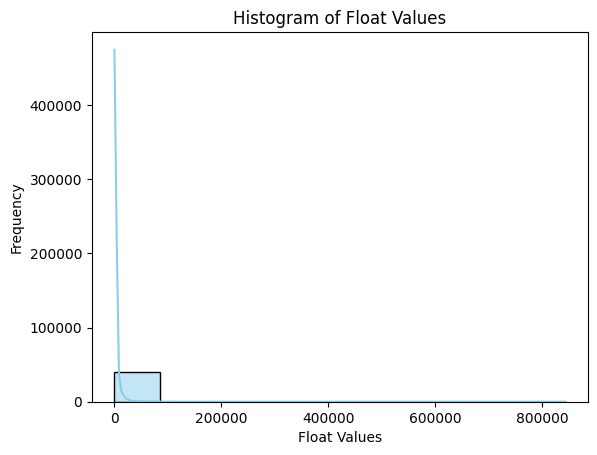

In [ ]:
sns.histplot(df['shares'], bins=10, kde=True, color='skyblue')  # You can adjust the number of bins as needed
plt.xlabel('Float Values')
plt.ylabel('Frequency')
plt.title('Histogram of Float Values')
plt.show()

In [ ]:
# For numerical variables
df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [ ]:
df['shares'].nlargest(100)

url
http://mashable.com/2013/07/03/low-cost-iphone/                        843300
http://mashable.com/2013/04/15/dove-ad-beauty-sketches/                690400
http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/    663600
http://mashable.com/2013/11/18/kanye-west-harvard-lecture/             652900
http://mashable.com/2013/03/02/wealth-inequality/                      617900
                                                                        ...  
http://mashable.com/2014/09/07/things-you-can-buy-for-a-dollar/         77200
http://mashable.com/2014/03/31/google-plus-twitter-engagement/          75600
http://mashable.com/2014/12/11/kerry-peru-climate-summit/               75500
http://mashable.com/2014/01/23/ceres-dwarf-planet-water/                74300
http://mashable.com/2013/09/11/tina-brown-leave-daily-beast/            74100
Name: shares, Length: 100, dtype: int64

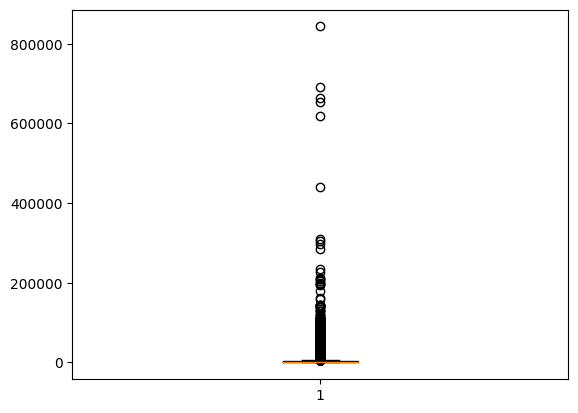

In [ ]:
# Box plot for outlier detection
plt.boxplot(df['shares'])
plt.show()

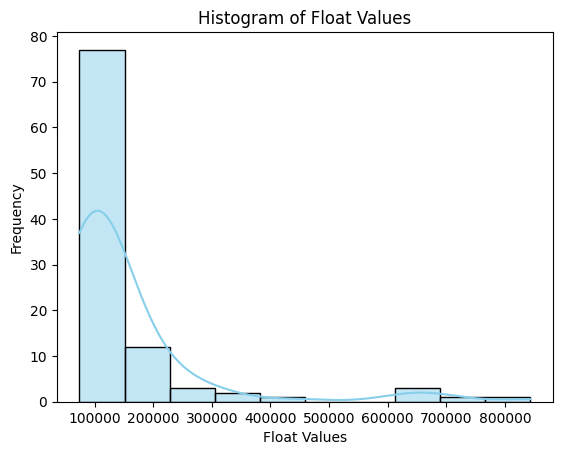

In [ ]:
sns.histplot(df['shares'].nlargest(100), bins=10, kde=True, color='skyblue')  # You can adjust the number of bins as needed
plt.xlabel('Float Values')
plt.ylabel('Frequency')
plt.title('Histogram of Float Values')
plt.show()

In [ ]:
df['shares'].nsmallest(100)

url
http://mashable.com/2013/12/09/wand-remote-control/                                      1
http://mashable.com/2013/04/01/troll-appreciation-day-tickets-2/                         4
http://mashable.com/2014/12/10/mad-max-trailer/                                          5
http://mashable.com/2013/07/11/nokia-lumia-1020/                                         8
http://mashable.com/2014/01/16/titanic-replica-theme-park/                              22
                                                                                      ... 
http://mashable.com/2014/10/22/debris-donetsk/                                         111
http://mashable.com/2013/05/22/repair-the-rockaways/                                   112
http://mashable.com/2014/10/20/bluesmart-indiegogo-funded/                             112
http://mashable.com/2013/06/03/frank-lautenberg-farewell/                              114
http://mashable.com/2014/09/05/the-terror-organization-defeating-the-islamic-state/   

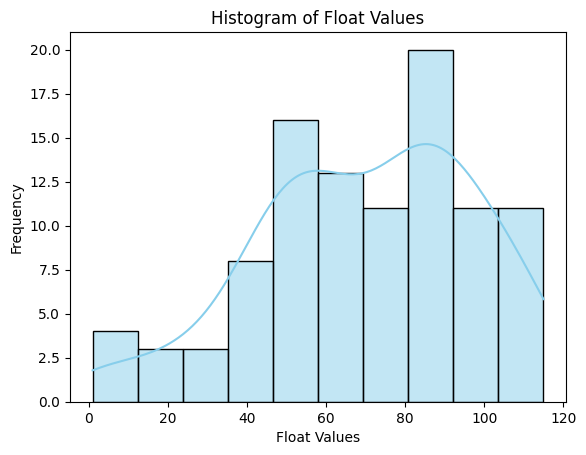

In [ ]:
sns.histplot(df['shares'].nsmallest(100), bins=10, kde=True, color='skyblue')  # You can adjust the number of bins as needed
plt.xlabel('Float Values')
plt.ylabel('Frequency')
plt.title('Histogram of Float Values')
plt.show()

<ipython-input-20-c98ef14bb505>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                               timedelta  n_tokens_title  n_tokens_content  \
timedelta                       1.000000       -0.240320         -0.062867   
n_tokens_title                 -0.240320        1.000000          0.018160   
n_tokens_content               -0.062867        0.018160          1.000000   
n_unique_tokens                 0.002866       -0.005318         -0.004737   
n_non_stop_words                0.000089       -0.004754          0.017512   
n_non_stop_unique_tokens        0.003805       -0.005420          0.000373   
num_hrefs                      -0.000832       -0.053496          0.423065   
num_self_hrefs                  0.064530       -0.014856          0.304682   
num_imgs                       -0.027636       -0.008858          0.342600   
num_videos                      0.000936        0.051460          0.103699   
average_token_length            0.130465       -0.071403          0.167789   
num_keywords                    0.046884       -0.006077        

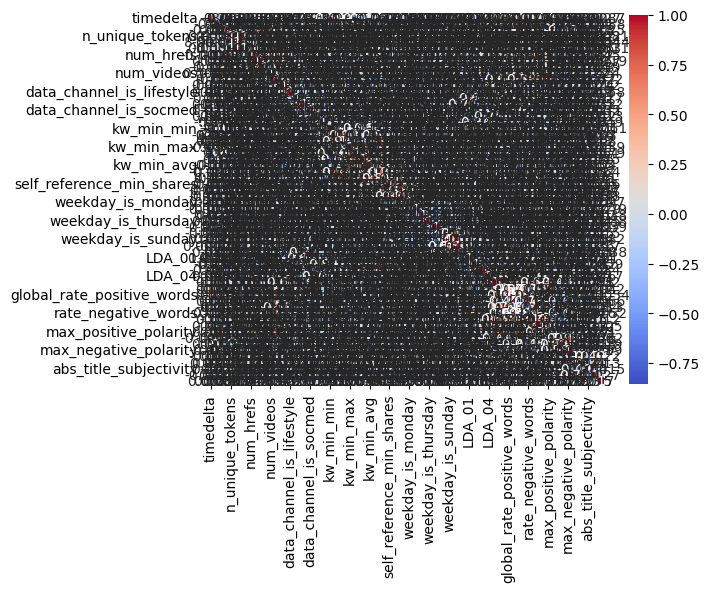

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)
# Heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



In [ ]:
df[df.columns[1:]].corr()['shares'][:]


<ipython-input-21-220aca1de37c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df.columns[1:]].corr()['shares'][:]


n_tokens_title                   0.008783
n_tokens_content                 0.002459
n_unique_tokens                  0.000806
n_non_stop_words                 0.000443
n_non_stop_unique_tokens         0.000114
num_hrefs                        0.045404
num_self_hrefs                  -0.001900
num_imgs                         0.039388
num_videos                       0.023936
average_token_length            -0.022007
num_keywords                     0.021818
data_channel_is_lifestyle        0.005831
data_channel_is_entertainment   -0.017006
data_channel_is_bus             -0.012376
data_channel_is_socmed           0.005021
data_channel_is_tech            -0.013253
data_channel_is_world           -0.049497
kw_min_min                      -0.001051
kw_max_min                       0.030114
kw_avg_min                       0.030406
kw_min_max                       0.003901
kw_max_max                       0.007863
kw_avg_max                       0.044686
kw_min_avg                       0

* No signs of Strong Correlation to the target variable "shares'

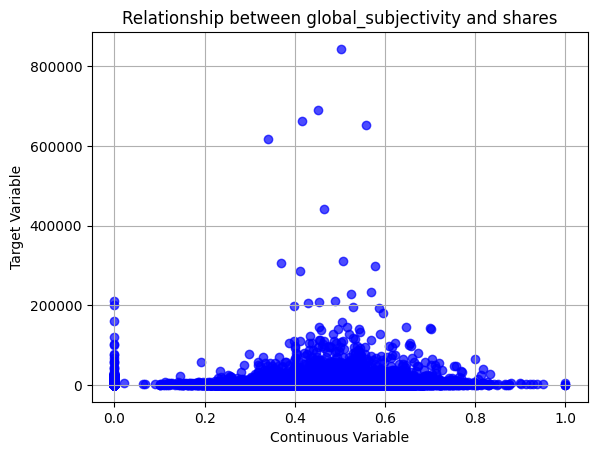

In [ ]:
# Create a scatter plot

plt.scatter(df['global_subjectivity'], df['shares'], color='blue', alpha=0.7)
plt.xlabel('Continuous Variable')
plt.ylabel('Target Variable')
plt.title('Relationship between global_subjectivity and shares')
plt.grid(True)
plt.show()

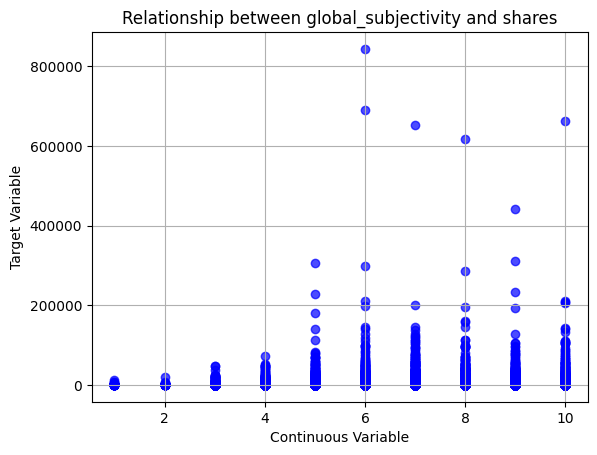

In [ ]:
# Create a scatter plot

plt.scatter(df['num_keywords'], df['shares'], color='blue', alpha=0.7)
plt.xlabel('Continuous Variable')
plt.ylabel('Target Variable')
plt.title('Relationship between global_subjectivity and shares')
plt.grid(True)
plt.show()

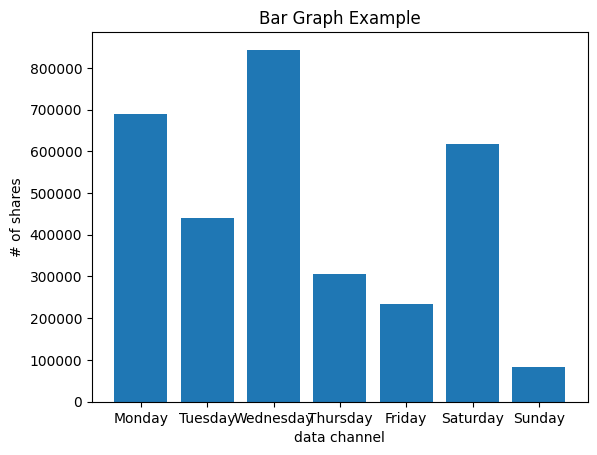

In [ ]:
plt.bar(df['day_published'], df['shares'])

# Add titles and labels
plt.title('Bar Graph Example')
plt.xlabel('data channel')
plt.ylabel('# of shares')

# Show the plot
plt.show()

<Axes: xlabel='data_channel', ylabel='Percent'>

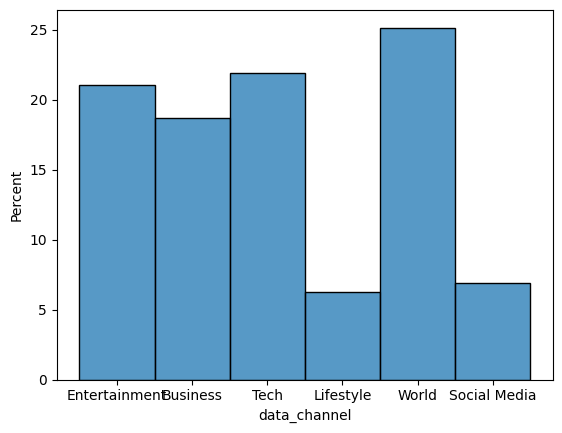

In [ ]:
sns.histplot(binwidth=0.5, x="data_channel", data=df, stat="percent", multiple="stack")


<Axes: xlabel='day_published', ylabel='Percent'>

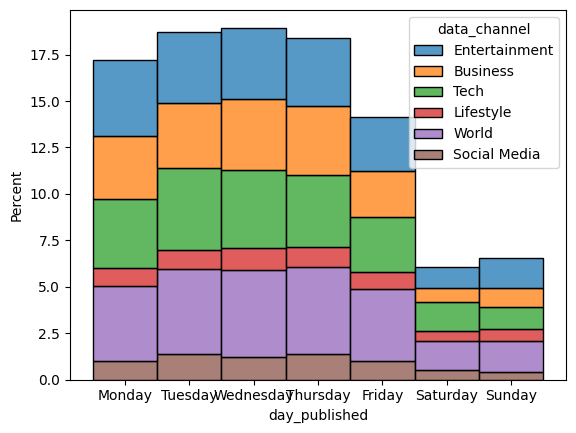

In [ ]:
sns.histplot(binwidth=0.5, x="day_published", hue="data_channel", data=df, stat="percent", multiple="stack")


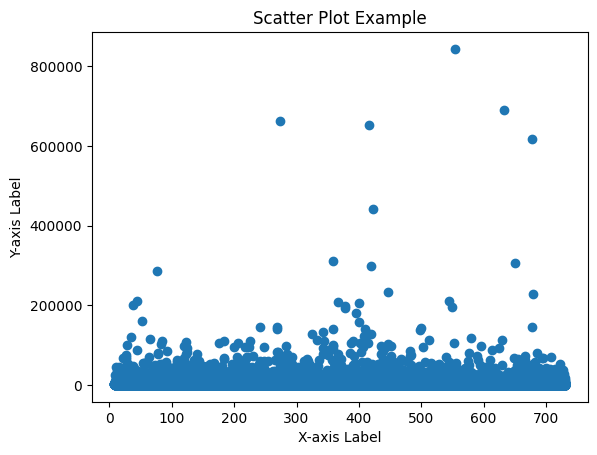

In [ ]:
plt.scatter(df['timedelta'], df['shares'])

# Optionally add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')

# Show the plot
plt.show()

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

In [ ]:
df.dtypes

timedelta                         int64
n_tokens_title                    int64
n_tokens_content                  int64
n_unique_tokens                 float64
n_non_stop_words                float64
                                 ...   
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
shares                            int64
data_channel                     object
day_published                    object
Length: 62, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

In [ ]:
# For simplicity, let's consider all the columns as features except for the target 'shares' for now.
X = df.drop(columns=['shares','data_channel','day_published'])
y = df['shares']

In [ ]:
# Log-transform the target variable to reduce the effect of very large share counts
y_log = np.log1p(y)

# Split the data into training and test sets
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

# Initialize models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

In [ ]:
# Function to train and evaluate models
def train_evaluate(models, X_train, y_train, X_test, y_test):
    rmsle_scores = {}
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Predict on test set
        y_pred_log = model.predict(X_test)
        # Calculate RMSLE
        rmsle_score = np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_log)))
        rmsle_scores[name] = rmsle_score
    return rmsle_scores


In [ ]:
# Train and evaluate models
rmsle_scores = train_evaluate(models, X_train_scaled, y_train_log, X_test_scaled, y_test_log)
rmsle_scores


{'LinearRegression': 0.8650581765623193,
 'Ridge': 0.8649292161761823,
 'Lasso': 0.9259058520210393,
 'RandomForestRegressor': 0.8484159981941064,
 'GradientBoostingRegressor': 0.8423116036054709}

## Improving RMSLE scores
* GradientBoostingRegressor had the best RMSLE score.
* Goal is to improve the GradientBoostingRegressor Model even further by tuning Hyperparameters and reducing noice.

#Implement Feature Engineering
* Eliminate Noise in the data
* Only include data with correlation


In [ ]:
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV

# Correcting the data splitting process to match the length of the log-transformed target
# We need to ensure that the train-test split is done after the log transformation
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Create a pipeline that includes standardization and linear regression
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Use Recursive Feature Elimination with Cross-Validation (RFECV) to find the best number of features
rfecv = RFECV(estimator=pipeline['linearregression'], step=1, cv=5, scoring='neg_mean_squared_error')

# Fit RFECV to the training data and the log-transformed target
rfecv.fit(X_train, y_log_train)

# The optimal number of features can be found at `rfecv.n_features_`
optimal_features = X_train.columns[rfecv.support_]

# Train the final model with the optimal number of features
final_pipeline = make_pipeline(StandardScaler(), LinearRegression())
final_pipeline.fit(X_train[optimal_features], y_log_train)

# Perform cross-validation to evaluate the model using RMSLE
# We have to make a custom scorer since scikit-learn does not have RMSLE by default
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Cross-validation scores
cv_scores_rmsle = cross_val_score(final_pipeline, X_train[optimal_features], y_log_train, cv=5, scoring=rmsle_scorer)

# The mean RMSLE across the folds
mean_rmsle = -cv_scores_rmsle.mean()

optimal_features, mean_rmsle


(Index(['LDA_00', 'LDA_01', 'LDA_02', 'LDA_04'], dtype='object'),
 0.10454053680004241)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline that standardizes the data then applies Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define a grid of alpha values to search over
params = {'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Setup the grid search
grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_log_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['ridge__alpha']

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Coefficients of the best model
coefficients = best_model.named_steps['ridge'].coef_

coefficients


In [ ]:
# Assuming 'best_model' is the Ridge pipeline from GridSearchCV that contains the scaler and ridge steps
# and 'X_train.columns' are the feature names

# Get the coefficients from the best Ridge model
ridge_coefficients = best_model.named_steps['ridge'].coef_

# Create a DataFrame to display feature names alongside their corresponding coefficients
feature_coefficients = pd.DataFrame(data=ridge_coefficients, index=X_train.columns, columns=['Coefficient'])

# Sort the features by the absolute value of their coefficients in descending order
# This will show the most influential features at the top
most_influential_features = feature_coefficients.abs().sort_values(by='Coefficient', ascending=False)

# Display the most influential features
print(most_influential_features)


In [ ]:
def remove_outliers_iqr(df, column_name, threshold=1.5):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

# Remove outliers from the DataFrame
filtered_df = remove_outliers_iqr(df, 'shares')

# Display the filtered DataFrame
print("Filtered DataFrame:")
print(filtered_df)

In [55]:
# Now after getting the most_influential_features results , let's consider all important columns as features except for the target 'shares'
# Only including the top 25 features with the higest coefficient
X = filtered_df.drop(columns=['shares','data_channel','day_published'])
y = filtered_df['shares']

In [56]:
# Log-transform the target variable to reduce the effect of very large share counts
y_log = np.log1p(y)

# Split the data into training and test sets
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [57]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
# Train and evaluate models
rmsle_scores = train_evaluate(models, X_train_scaled, y_train_log, X_test_scaled, y_test_log)
rmsle_scores


{'LinearRegression': 0.5828303921448712,
 'Ridge': 0.5820440905781673,
 'Lasso': 0.6261719521798559,
 'RandomForestRegressor': 0.5615026400171582,
 'GradientBoostingRegressor': 0.5608848079972696}

# Improvement
After taking out the outliers, the gradiant boosting is still supiorior.
* Next goal is to try and optimize the model to get a better score

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Create a GradientBoostingRegressor model
model = GradientBoostingRegressor()

# Define distributions for hyperparameters
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 6)
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the RandomizedSearchCV object to your data
random_search.fit(X_train_scaled, y_train_log)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on your test data
best_score = best_model.score(X_test, y_test_log)
print("Best Model Score:", best_score)


Best Hyperparameters: {'learning_rate': 0.10121399684340719, 'max_depth': 5, 'n_estimators': 100}
Best Model Score: -0.40276940083509993


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [60]:
# Create a GradientBoostingRegressor model with custom hyperparameters
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.10121399684340719,
    max_depth=5,
    random_state=42
)

# Train the model on the training data
model.fit(X_train_scaled, y_train_log)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate RMSLE
rmsle_score = np.sqrt(mean_squared_log_error(np.expm1(y_test_log), np.expm1(y_pred)))

rmsle_score


0.5549698332806907